# Examples of different raster colorizers

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

import geoengine as ge
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [22]:
ge.initialize("http://localhost:3030/api")

In [23]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             302ee900-dcb0-42f2-9e7b-2222bb0fa813
Session Id:          05c0b55c-b81c-492b-b337-5a1593c58828
Session valid until: 2024-12-06T11:58:52.537Z

## Define workflow of MODIS NDVI raster

In [24]:
workflow = ge.register_workflow({
        "type": "Raster",
        "operator": {
            "type": "GdalSource",
            "params": {
                "data": "ndvi"
            },
        },
})
workflow

0abf52bc-e7da-557b-be43-59b96b591f4a

In [25]:
# this method is only used to display the results a bit more concise.
def plot_geoengine_img(colorizer: list):
    # create horizontal subplots
    fig, axs = plt.subplots(1, len(colorizer), figsize=(10, 5))

    imgs = []
    for col in colorizer:
        img = workflow.wms_get_map_as_image(
            ge.QueryRectangle(
                ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
                ge.TimeInterval(np.datetime64('2014-04-01T12:00:00')),
                resolution=ge.SpatialResolution(1.8, 1.8),
            ),
            ge.SingleBandRasterColorizer(0, col),
        )

        imgs.append(img)

    for (ax, img) in zip(axs, imgs):
        ax.imshow(img)

## General Creation of a Colorizer Instance with Default Values

In [26]:
# note: you have to specify a min/max range for your colormap calls
# and the name of the colormap
co = Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255))

## Using Default Colormaps

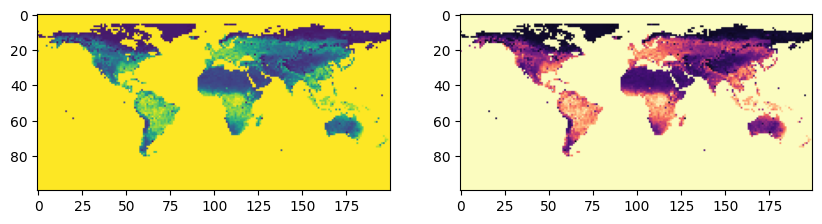

In [27]:
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255)),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255)),
]
plot_geoengine_img(colors)

## Configuring the Number of Steps

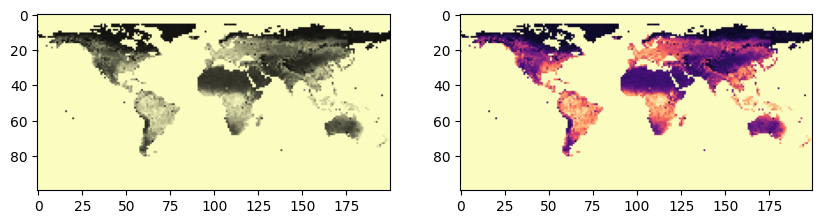

In [28]:
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255), n_steps=2),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255), n_steps=20),
]
plot_geoengine_img(colors)

## Configuring the Value Range

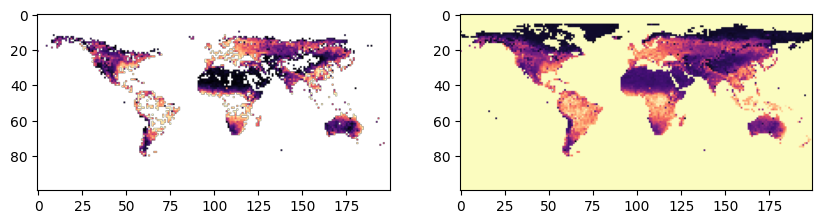

In [29]:
# note: 1st map shows, that the defaults set earlier are overriden (for that map)
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(50, 200)),
    Colorizer.linear_with_mpl_cmap(color_map="magma", min_max=(0, 255)),
]
plot_geoengine_img(colors)

## Using Custom Maps

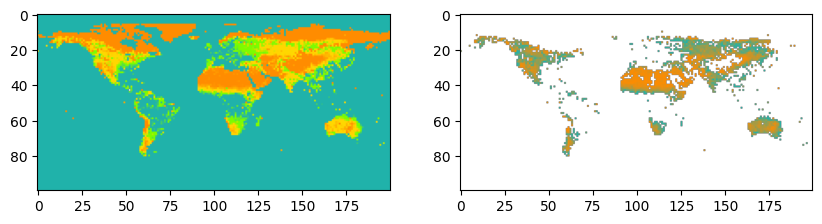

In [30]:
custom_map = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
colors = [
    Colorizer.linear_with_mpl_cmap(color_map=custom_map, min_max=(0, 255)),  # default
    Colorizer.linear_with_mpl_cmap(
        color_map=custom_map, n_steps=2, min_max=(50, 150)
    ),  # with options
]
plot_geoengine_img(colors)

## Using over/under colors

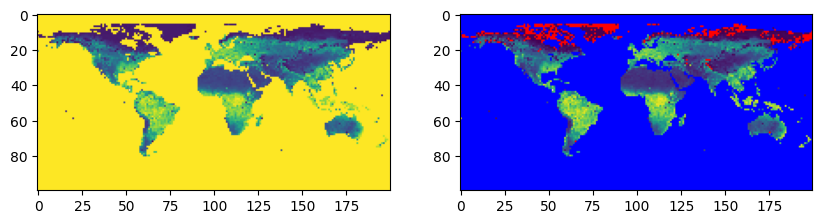

In [31]:
# we need to cut off the extreme values in order to show the over/under colors
colors = [
    Colorizer.linear_with_mpl_cmap(color_map="viridis", min_max=(0, 255)),
    Colorizer.linear_with_mpl_cmap(
        color_map="viridis",
        min_max=(20, 254),
        over_color=(0, 0, 255, 255),
        under_color=(255, 0, 0, 255),
    ),
]
plot_geoengine_img(colors)

# Using the Palette Colorizer
We need a different dataset, so let's define a new workflow.

In [32]:
workflow = ge.register_workflow(
    {
        "type": "Raster",
        "operator": {
            "type": "GdalSource",
            "params": {
                "data": "land_cover"
            },
        },
    }
)
workflow

060926cb-2801-5ce0-9df1-4fe16d30f045

## Different Ways to Setup the Colorizer

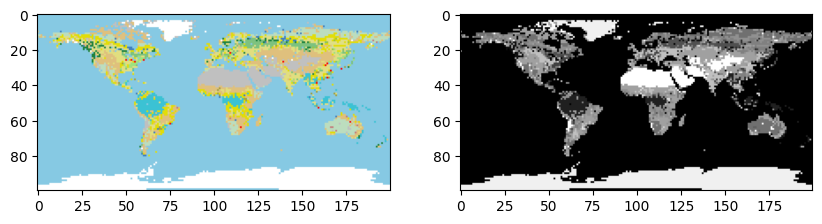

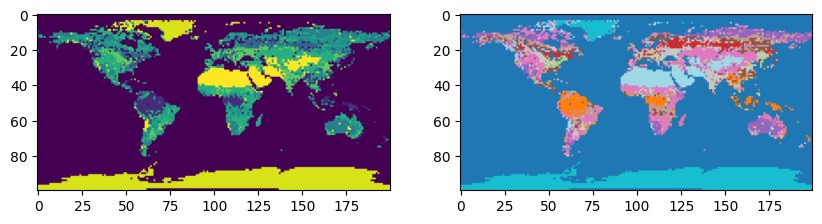

In [33]:
colors = [
    # Use an explicit mapping of values and colors
    Colorizer.palette(
        color_mapping={
            0.0: [134, 201, 227, 255],
            1.0: [30, 129, 62, 255],
            2.0: [59, 194, 212, 255],
            3.0: [157, 194, 63, 255],
            4.0: [159, 225, 127, 255],
            5.0: [125, 194, 127, 255],
            6.0: [195, 127, 126, 255],
            7.0: [188, 221, 190, 255],
            8.0: [224, 223, 133, 255],
            9.0: [226, 221, 7, 255],
            10.0: [223, 192, 125, 255],
            11.0: [66, 128, 189, 255],
            12.0: [225, 222, 127, 255],
            13.0: [253, 2, 0, 255],
            14.0: [162, 159, 66, 255],
            15.0: [255, 255, 255, 255],
            16.0: [192, 192, 192, 255],
        }
    ),
    # only pass the values you want to be colorized, defaults to a gray scale
    Colorizer.palette_with_colormap(values=np.arange(0.0, 17.0).tolist(), color_map="gray"),
]

plot_geoengine_img(colors)

colors = [
    # pass a continuous mpl colormap, the values will be discretized
    Colorizer.palette_with_colormap(
        values=np.arange(0.0, 17.0).tolist(), color_map="viridis"
    ),
    # pass a discrete mpl colormap. Keep the number of colors of the given map in mind while choosing!
    Colorizer.palette_with_colormap(
        values=np.arange(0.0, 17.0).tolist(), color_map="tab20"
    ),
]
plot_geoengine_img(colors)

## Multiband colorizer

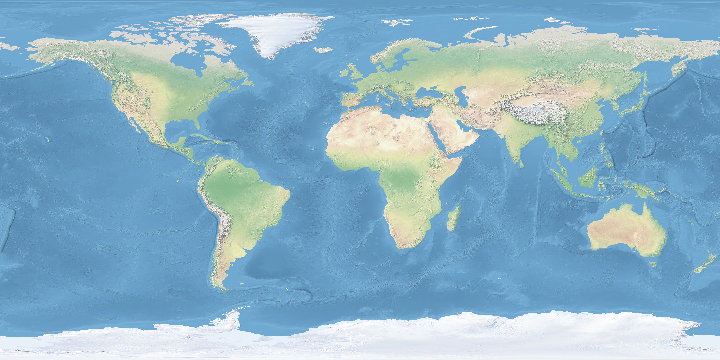

In [35]:
ge.register_workflow(
    ge.workflow_builder.operators.RasterStacker(
        sources=[
            ge.workflow_builder.operators.GdalSource('ne2_raster_blue'),
            ge.workflow_builder.operators.GdalSource('ne2_raster_green'),
            ge.workflow_builder.operators.GdalSource('ne2_raster_red'),
        ],
    )
).wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(np.datetime64('2014-04-01T12:00:00')),
        resolution=ge.SpatialResolution(0.5, 0.5),
    ),
    ge.MultiBandRasterColorizer(
        red_band=2,
        green_band=1,
        blue_band=0,
        red_min=0,
        red_max=255,
        red_scale=1,
        green_min=0,
        green_max=255,
        green_scale=1,
        blue_min=0,
        blue_max=255,
        blue_scale=1,
    ),
)
